![](../assets/header_image.png)

# Optional Assignment 6: Introduction to URDF

Welcome to the next optional assignment using Jupyros! This exercise notebook is optional. That means we only recommend this notebook to students who do *not* have expierence with

- **Robot Operating System (ROS)**
- **URDF**

In this assignment, you will

- **get a brief introduction to the URDF format**
- **learn how the JupyURDF can allow us to use notebook environment to update the .urdf file describing the robot**
- **add the sensors or links to a robot**

# Introduction

**URDF** stands for Unified Robot Description Format and it is a file format used to describe the physical and visual properties of a robot in the ROS ecosystem. URDF is used to model the kinematics, dynamics, sensors, and other properties of a robot in a structured and standardized way. This makes it easier for developers to visualize and simulate the robot's behavior in a virtual environment before implementing it in the real world. With URDF, developers can quickly and efficiently prototype, design, and test their robotic systems, reducing the time and cost associated with physical prototyping.

The robot description is defined in an `.urdf` file. In this exercise we will create a `.urdf` file from scratch. 

## Jupyterlab-URDF library:

Since we want to use and edit the `.urdf` file inside the jupyter notebook environment, we need to use the Jupyterlab-URDF library. We have already installed this library for you in the docker image, so that you can focus on learning about the `.urdf` file and its usage.

This libray provides the two features to work with the `.urdf` file:

1. To open the text editor for any URDF file, so that we can edit it
2. To visualize the robot model 

# URDF file

Lets first try to understand, What is the URDF file?

**URDF: Unified Robot Description Format (URDF) is an XML format file which is used in ROS to describe all elements of a robot.** 

It allows us to create visual robot model from the scratch that you can view in the RViz/Gazebo, in our case you can view this robot model inside the Zethus interface.


URDF describes a robot as a tree of links connected by joints. 

The links represent the physical components of the robot, and the joints represent how one link moves relative to another link, effectively defining the location of the links in space.

When we write URDF file, basically it is written in the XML format with a lots of tag defining the links and adding various properties to it. So URDF file might seem so long, but it contains a lot of repetitive elemets tag describing the simple structures. 

## The link: 

A part of the robot is moving relative to another part (e.g. each segment of a robotic arm) or A part that is not moving relative to another part, but it is convenient to have its own reference point and transform (a common example would be the location of a sensor such as a camera or lidar)

## The joint: 

To cover these scenarios, when we define a joint (the connection between two links) we need to choose what type of joint it is. There are quite a few types, but the most common are:

    1. Revolute - A rotational motion, with minimum/maximum angle limits.
    2. Continuous - A rotational motion with no limit (e.g. a wheel).
    3. Prismatic - A linear sliding motion, with minimum/maximum position limits.
    4. Fixed - The child link is rigidly connected to the parent link.


URDF file is an XML file, that contains the series of the nested loop to describe the robot in the form of the tags.

There are many tags, but we should atleast be familiar with the following three,

**1. XML version and Robot tag:**

In the beginning we will add the XML version and then on the second line, we should add the root tag, in our case, robot tag would act as a root tag and encapsulates all other tags. 

You can write it as follows with the XML tags,


```xml
<?xml version="1.0"?>
<robot name="my_robot">
# ...
# all other tags
# ...
</robot>
```

**2. Link tags:**

A 'link' tag allow us to add attribute 'name' of a link, as well as some additional characteristics 
- the visual, collision, and inertial properties. 
These additional tags are generally optional, however they will be required for certain situations such as simulations (which we’ll cover in a later tutorial).

Visual - This is what we see in RViz and Gazebo. We can specify three aspects:
        Geometry - box/ cylinder / sphere with size parameters, or a mesh
        Origin - an offset for the geometry so it doesn’t need to be centred around the link origin
        Material - Basically, the colour. We can specify the name of a declared material, or describe the colour directly.
    
Collision - This is used for physics collision calculations.

We can set the:
        Geometry and Origin - Same options as for visual. This will often be copy-pasted from the Visual tag, however we may want a simpler collision geometry (e.g. box instead of a mesh) for computational reasons.
    
Inertial - This is also used for physics calculations, but determines how the link responds to forces. 

The inertial properties are:
        Mass - Mass of the link
        Origin - The centre of mass (a.k.a centre of gravity). 
        Inertia - The rotational inertia matrix.

You can write them as follows with XML tags,

```xml
<link name="base">
  <visual>
     <geometry/>
     <origin/>
     <material/>
  </visual>
  
  <collision>
     <geometry/>
     <origin/>
  </collision>
  
  <inertial>
     <mass/>
     <origin/>
     <inertia/>
  </inertial>
  
</link>
```

3. Joint tags

Each joint will need to have the following specified:

Name - A name for the joint. 
Type - The joint type as mentioned earlier (the four most popular being fixed, prismatic, revolute, and continuous).
Parent and child links - Which links this joint defines a relationship between
Origin - The relationship between the two links

For a fixed joint these parameters will be sufficient, but for non-fixed joints we will usually want to specify some other characteristics.

There are a few to choose from, but the two most common will be:

Axis - Which axis to move along or around
Limits - Physical actuation limits, which may be expected by other parts of the system. 

You can write them as follows with XML tags if we assume we have two links representing the Base and the camera ,


```xml
<joint name="joint_1" type="fixed">
     <parent link="base"/>
     <child link="camera"/>
     <origin xyz="0 0.22 0.25"/>
</joint>
```

# Introducing Xacro
Xacro lets us manipulate the URDF files in various ways, but the two main ones we’ll look at are splitting up code into multiple files, and avoiding duplicate code.

You can write them as follows with XML tags,

```xml
<robot xmlns:xacro="http://www.ros.org/wiki/xacro">
```

As usual, its robot tag will have a name. Inside this file, we can “include” another file. 

It’s sort of like the tags in the included file are copied-and-pasted into the main file. 

we can also use the xacro:macro to include the small code inside the main file to avoid the repetition.

To include another file we use the xacro:include tag like this:

```xml
<xacro:include filename="<your subfile>.xacro"/>
```

# Build the Simple robot urdf file:
here we will consider the robot with a base frame, two standard wheels and one castor wheel, and one lidar sensor link.
Try to open the Robot.urdf file in this folder. which would allow you to view the robot model.
you can right click on this and open the urdf file in the editor mode, which would allow you to edit the urdf file.

## Add the line specifying the xml version and then add the robot tag

```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
# ...
# add other tags here
#...
</robot>
```

## Add the base link inside the robot tag

```xml
<link name="base_link">
</link>
```

then it should look like this,


```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
```

## Add the chassis link tag and tag describing the joint between the chassis and base link

```xml
<link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="white"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
</link>

<joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
</joint>
```

then it should look like this,

```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
    <link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
    </link>
    <joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
    </joint>
```

## Add the left link tag and tag describing the joint between the chassis and left wheel link

```xml
<!-- LEFT WHEEL -->

<joint name="left_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="left_wheel"/>
        <origin xyz="0 0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
</joint>

<link name="left_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
</link>
```

then it should look like this,

```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
    <link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
    </link>
    <joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
    </joint>
    
    <!-- LEFT WHEEL -->

    <joint name="left_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="left_wheel"/>
        <origin xyz="0 0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="left_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
    </link>
```

## Add the right wheel link tag and tag describing the joint between the chassis and right wheel link

```xml
<!-- RIGHT WHEEL -->

<joint name="right_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="right_wheel"/>
        <origin xyz="0 -0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
</joint>

<link name="right_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
         <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </collision>
</link>
```

then it should look like this,

```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
    <link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
    </link>
    <joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
    </joint>
    
    <!-- LEFT WHEEL -->

    <joint name="left_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="left_wheel"/>
        <origin xyz="0 0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="left_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
    </link>
    
     <!-- RIGHT WHEEL -->

    <joint name="right_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="right_wheel"/>
        <origin xyz="0 -0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="right_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
         <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </collision>
     </link>
```

## Add the sphere wheel link tag and tag describing the joint between the chassis and sphere wheel link

```xml
<!-- SPHERE WHEEL -->

    <joint name="sphere_wheel_joint" type="fixed">
        <parent link="chassis"/>
        <child link="sphere_wheel"/>
        <origin xyz="0.24 0 0" rpy="0 0 0"/>
    </joint>

    <link name="sphere_wheel">
        <visual>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
    </visual>
        <collision>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
    </collision>
     </link>
```

then it should look like this,

```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
    <link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
    </link>
    <joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
    </joint>
    
    <!-- LEFT WHEEL -->

    <joint name="left_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="left_wheel"/>
        <origin xyz="0 0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="left_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
    </link>
    
     <!-- RIGHT WHEEL -->

    <joint name="right_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="right_wheel"/>
        <origin xyz="0 -0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="right_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
         <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </collision>
     </link>
    
    <!-- SPHERE WHEEL -->

    <joint name="sphere_wheel_joint" type="fixed">
        <parent link="chassis"/>
        <child link="sphere_wheel"/>
        <origin xyz="0.24 0 0" rpy="0 0 0"/>
    </joint>

    <link name="sphere_wheel">
        <visual>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
        </collision>
    </link>
```

## Add the lidar link tag and tag describing the joint between the chassis and lidar link

```xml
<link name="lidar_link">   
       <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="purple"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
</link>
<joint name="laser_joint" type="fixed">
        <parent link="chassis"/>
        <child link="lidar_link"/>
        <origin xyz="0.24 0 0.175" rpy="0 0 0"/>
</joint>
```

## Final form of the urdf should be as below, which you can also view by opening the editor as follows

To open the text editor for any URDF file, simply right click on the file and select “Open With” > “Editor”.


```xml
<?xml version="1.0"?>
<robot xmlns:xacro="http://www.ros.org/wiki/xacro"  name="robot">
    <link name="base_link">
    </link>
    <link name="chassis">
        <visual>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <origin xyz="0.15 0 0.075" rpy="0 0 0"/>
            <geometry>
                <box size="0.3 0.3 0.15"/>
            </geometry> 
        </collision>
    </link>
    <joint name="chassis_joint" type="fixed">
        <parent link="base_link"/>
        <child link="chassis"/>
        <origin xyz="-0.1 0 0"/>
    </joint>
    
    <!-- LEFT WHEEL -->

    <joint name="left_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="left_wheel"/>
        <origin xyz="0 0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="left_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
    </link>
    
     <!-- RIGHT WHEEL -->

    <joint name="right_wheel_joint" type="continuous">
        <parent link="base_link"/>
        <child link="right_wheel"/>
        <origin xyz="0 -0.175 0" rpy="-1.57079633 0 0"/>
        <axis xyz="0 0 1"/>
    </joint>

    <link name="right_wheel">
        <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </visual>
         <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="blue"/>
        </collision>
     </link>
    
    <!-- SPHERE WHEEL -->

    <joint name="sphere_wheel_joint" type="fixed">
        <parent link="chassis"/>
        <child link="sphere_wheel"/>
        <origin xyz="0.24 0 0" rpy="0 0 0"/>
    </joint>

    <link name="sphere_wheel">
        <visual>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
        </visual>
        <collision>
            <geometry>
                <sphere radius="0.05" />
            </geometry>
            <material name="black"/>
        </collision>
    </link>
    <!-- Lidar link -->
    
    <link name="lidar_link">   
       <visual>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
            <material name="purple"/>
        </visual>
        <collision>
            <geometry>
                <cylinder length="0.04" radius="0.05" />/>
            </geometry>
        </collision>
     </link>
      <joint name="laser_joint" type="fixed">
        <parent link="chassis"/>
        <child link="lidar_link"/>
        <origin xyz="0.24 0 0.175" rpy="0 0 0"/>
    </joint>
      
</robot>
```

# URDF file creation:


New files can also be created from the top menu or from the launcher.
File >> New Launcher >> Create new URDF

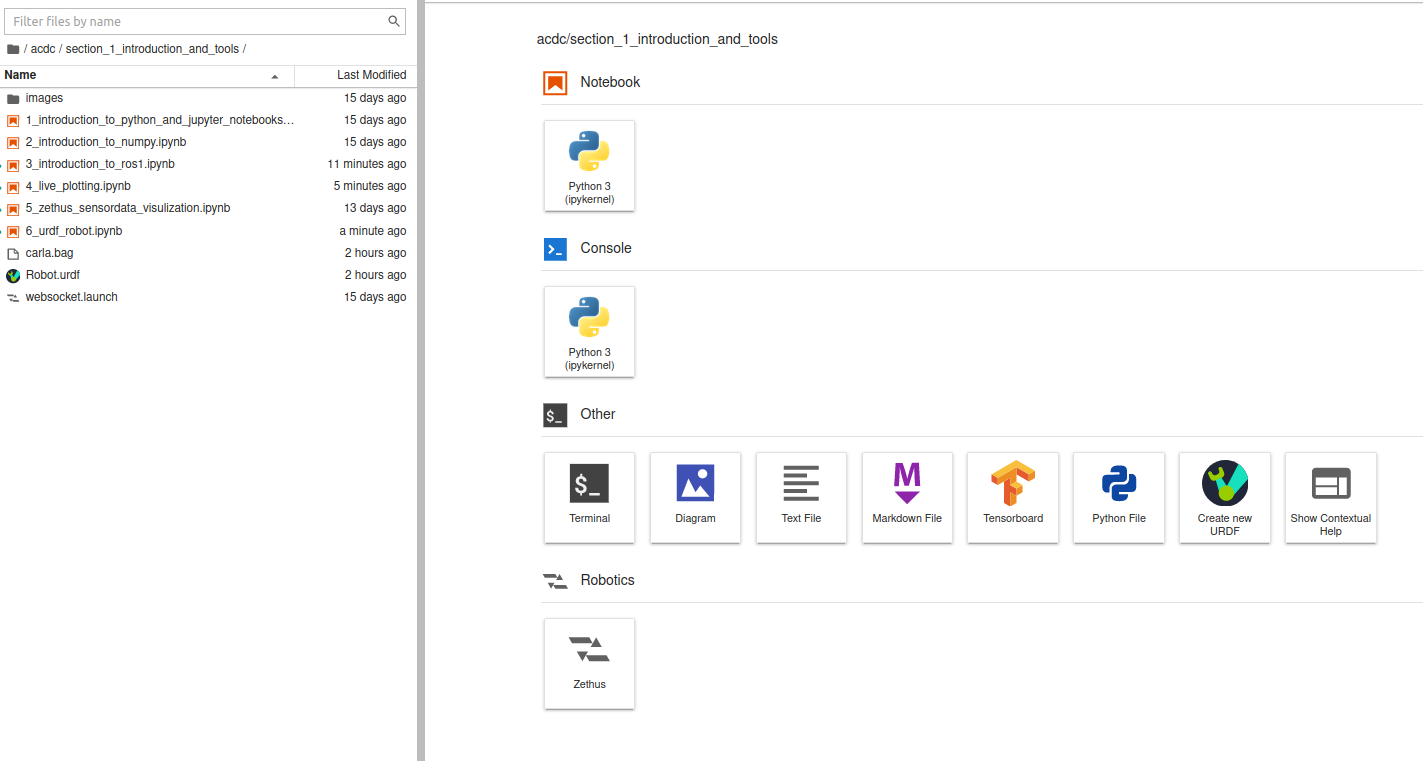

# URDF viewer: 

The simplest way to open the viewer is by double clicking on any already existing URDF file(in this case on, `Robot.urdf`) from the File Browser. 

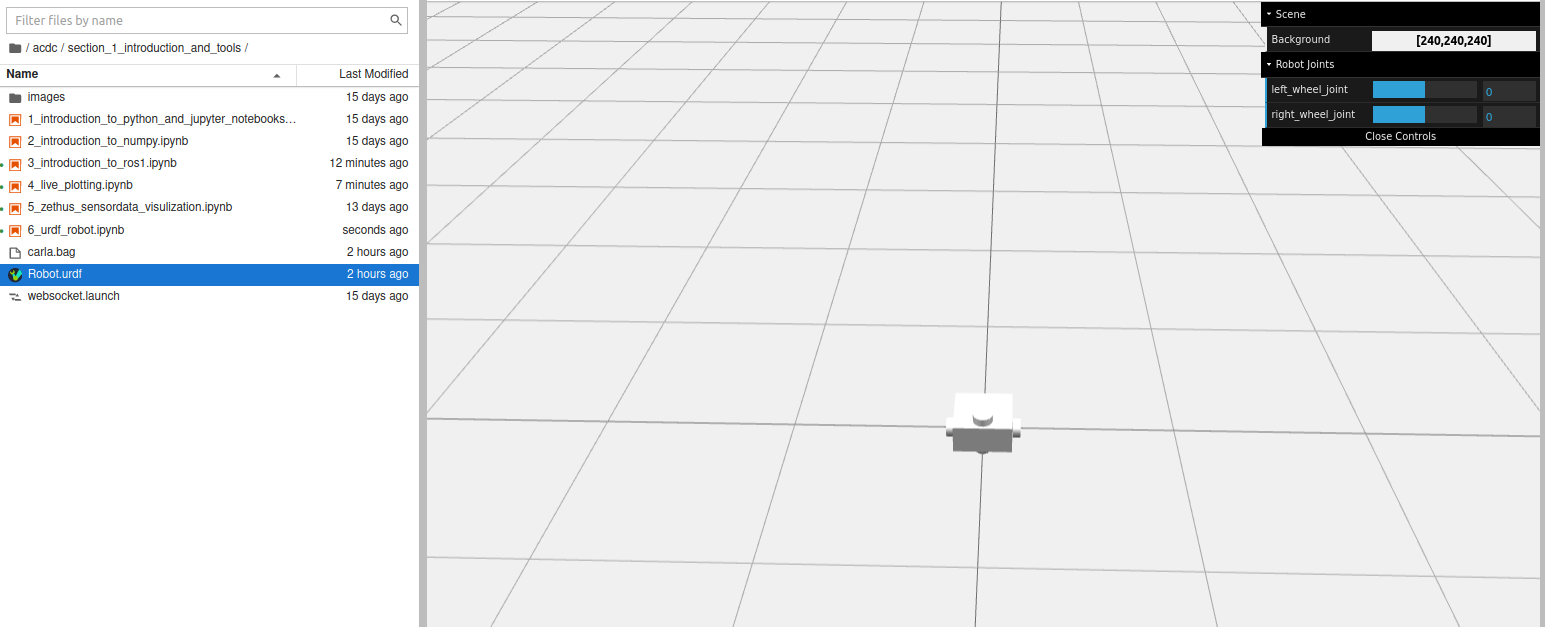

With the URDF editor open, files can be modified directly and the changes will be immediately reflected in the viewer.

# URDF Editor

To open the text editor for any URDF file, simply right click on the file and select “Open With” > “Editor”.

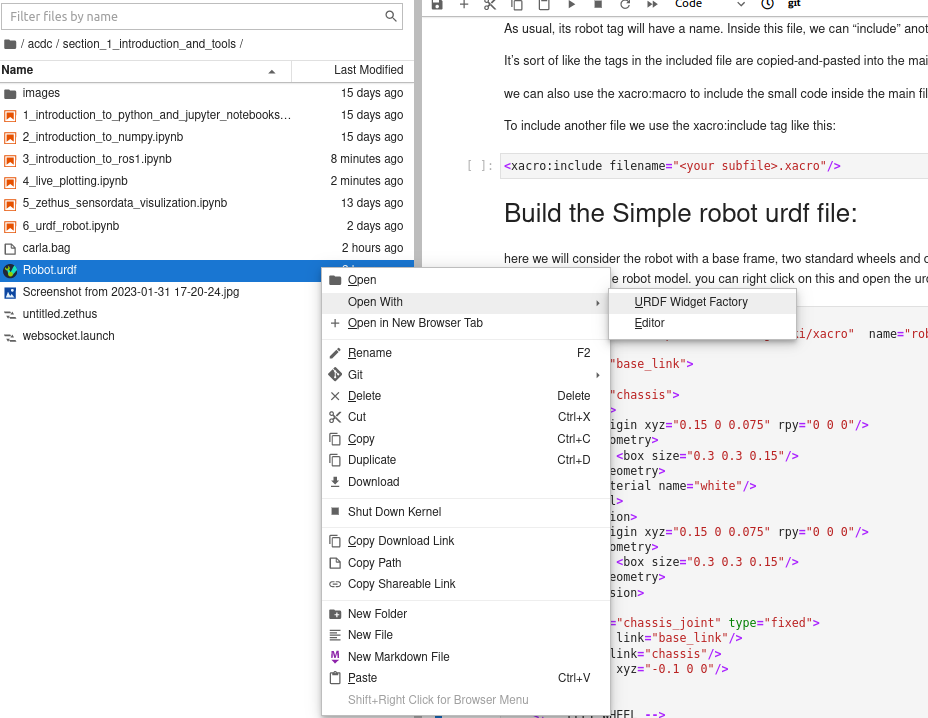

Once the file is open, syntax highlighting can be enabled by selecting “XML” from the language menu in the bottom left corner.

# Wrap up

- You learned URDF file and it's structure
- You learned about how to write the URDF file to include various elements
- You learned about writing the urdf file for the simple robot
- You learned how to view and edit any urdf file

## License

MIT License

Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University.